In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
from scipy.stats import mode 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
%matplotlib inline

In [4]:
data_path="datasets/Training.csv"
df=pd.read_csv(data_path).dropna(axis=1)
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


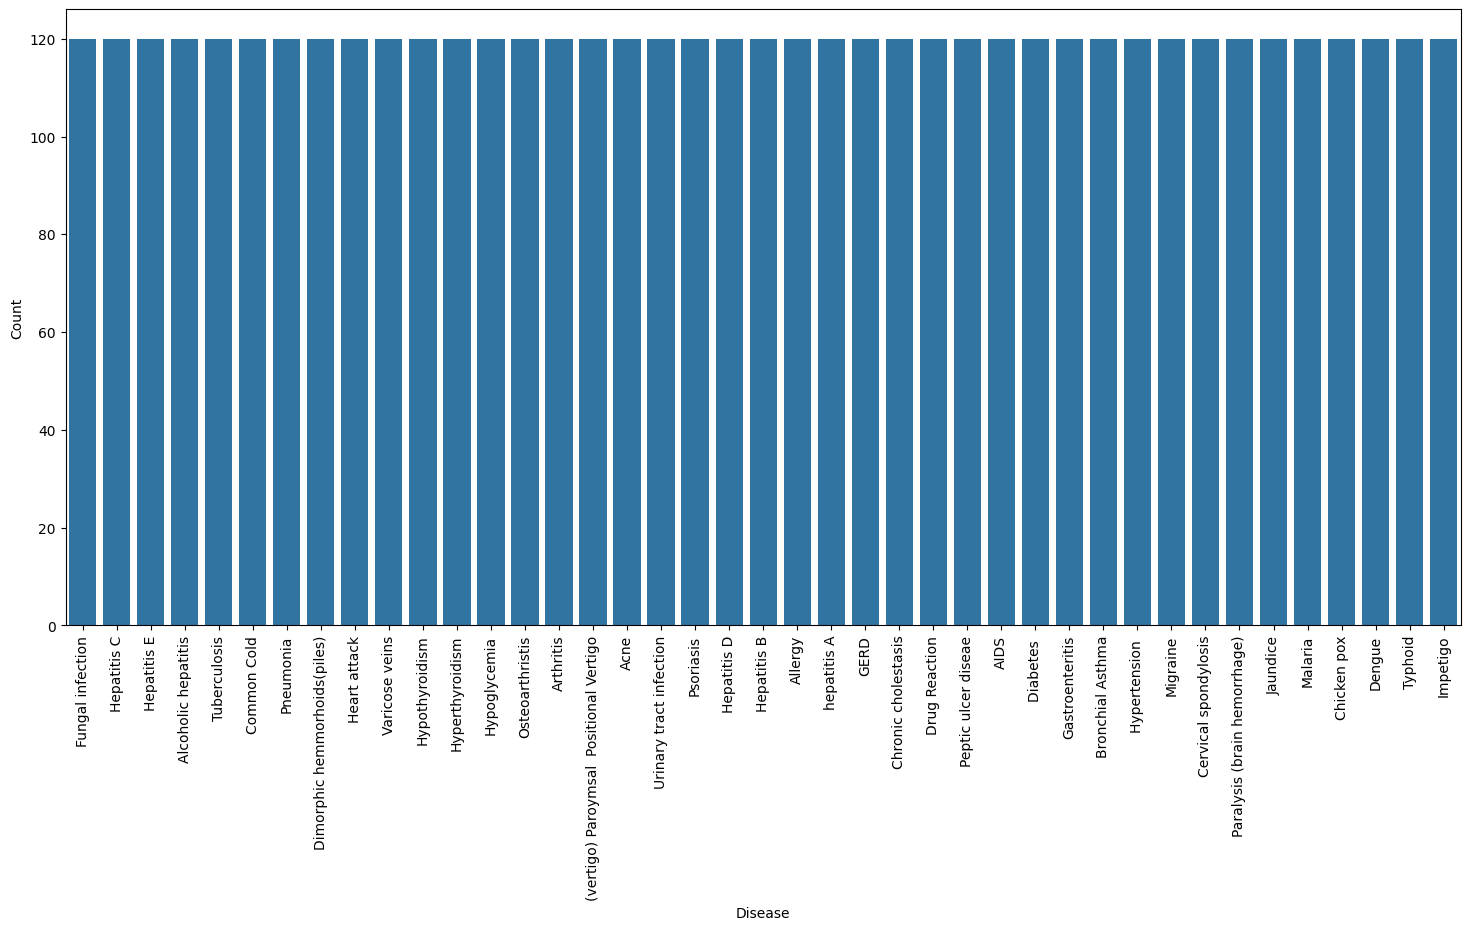

In [5]:
disease_count=df["prognosis"].value_counts()
temp_df=pd.DataFrame({
    "Disease":disease_count.index,
    "Count":disease_count.values
})
plt.figure(figsize=(18,8))
sns.barplot(x= "Disease",y="Count" ,data=temp_df)
plt.xticks(rotation=90)
plt.show()

Encoding the target value into numerical 
value using LabelEncoder

In [6]:
encoder=LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])

Splitting the data for training and testing the model

In [7]:
X= df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=24)

print(f"Train :{X_train.shape},{y_train.shape}")
print(f"Test{X_test.shape},{y_test.shape}")

Train :(3936, 132),(3936,)
Test(984, 132),(984,)


Model Building

Using K-Fold Cross-Validation for model selection


In [8]:
def cv_scoring(estimator,X,y):
    return accuracy_score(y,estimator.predict(X))


Initializing Models

In [9]:
models ={
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "RandomForest":RandomForestClassifier(random_state=18)
}

In [10]:
for model_name in models:
    model =models[model_name]
    scores=cross_val_score(model,X,y, cv=10,
                           n_jobs=-1,
                           scoring=cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"scores:{scores}")
    print(f"Mean score:{np.mean(scores)}")



SVC
scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score:1.0
Gaussian NB
scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score:1.0
RandomForest
scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score:1.0


SVM model

In [11]:
svm_model=SVC()
svm_model.fit(X_train, y_train)
preds=svm_model.predict(X_test)

In [12]:
print(f"Accuracy on train data by SVM Classifier :{accuracy_score(y_train,svm_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier :{accuracy_score(y_test,preds)*100}")

Accuracy on train data by SVM Classifier :100.0
Accuracy on test data by SVM Classifier :100.0


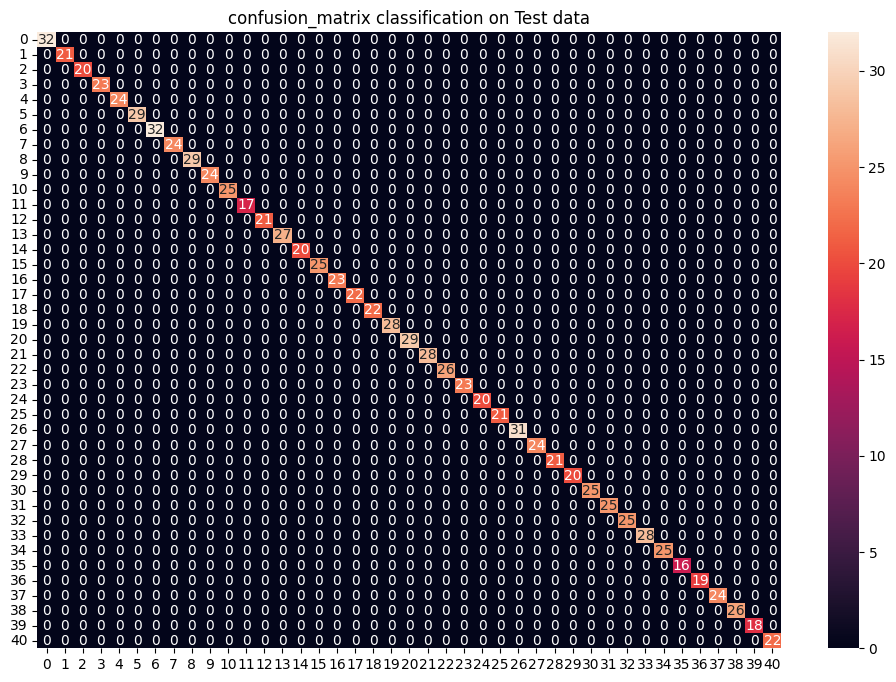

In [13]:
matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(matrix,annot=True)
plt.title("confusion_matrix classification on Test data")
plt.show()

In [27]:
nb_model=GaussianNB()
nb_model.fit(X_train, y_train)
preds=nb_model.predict(X_test)

In [28]:
print(f"accuracy_score on train data: {accuracy_score(y_train,nb_model.predict(X_train))*100}")
print(f"accuracy_score on test data: {accuracy_score(y_test,nb_model.predict(X_test))*100}")


accuracy_score on train data: 100.0
accuracy_score on test data: 100.0


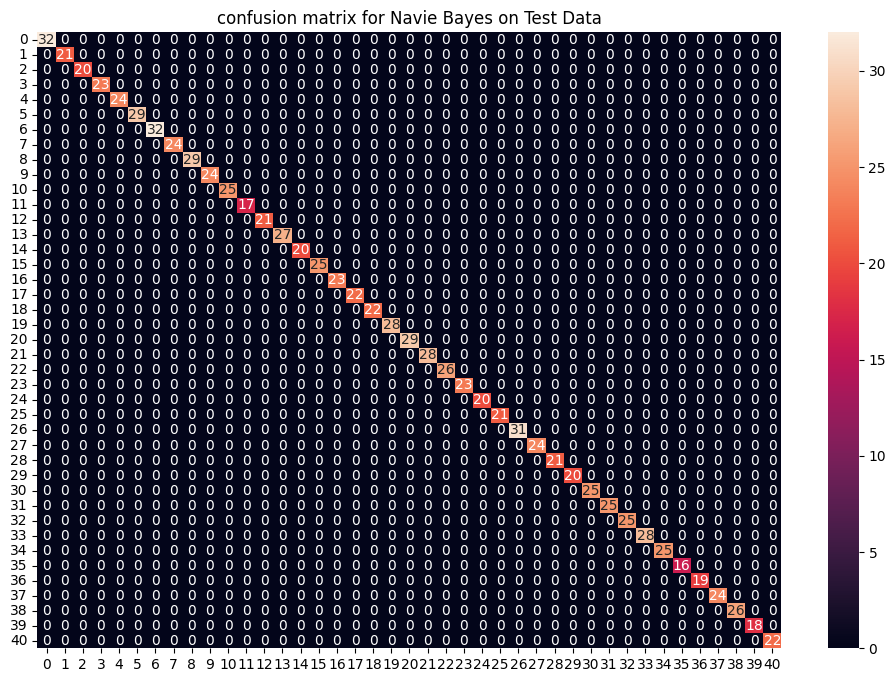

In [29]:
nb_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(nb_matrix,annot=True)
plt.title("confusion matrix for Navie Bayes on Test Data")
plt.show()

In [30]:
rf_model=RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds=rf_model.predict(X_test)

In [31]:
print(f"accuracy on train dataset by random classifer:{accuracy_score(y_train,rf_model.predict(X_train))*100}")
print(f"accuracy on test dataset by random classifer:{accuracy_score(y_test,rf_model.predict(X_test))*100}")

accuracy on train dataset by random classifer:100.0
accuracy on test dataset by random classifer:100.0


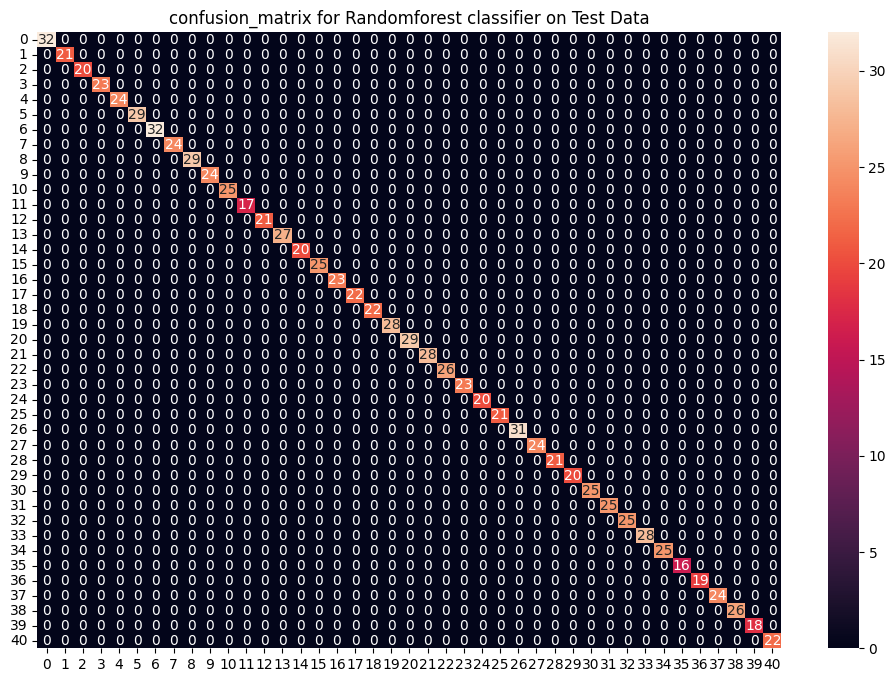

In [32]:
rf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(rf_matrix,annot=True)
plt.title("confusion_matrix for Randomforest classifier on Test Data")
plt.show()

Testing the models on Whole data

In [33]:



final_svm_model=SVC()
final_nb_model=GaussianNB()
final_rf_model=RandomForestClassifier(random_state=18)

final_svm_model.fit(X,y)
final_nb_model.fit(X,y)
final_rf_model.fit(X,y)



RandomForestClassifier(random_state=18)

Reading the test data

In [34]:
test_data=pd.read_csv("./datasets/Testing.csv").dropna(axis=1)

test_X=test_data.iloc[:,:-1]
test_y=encoder.transform(test_data.iloc[:,-1])

Making predictions

In [35]:
svm_preds=final_svm_model.predict(test_X)
nb_preds=final_nb_model.predict(test_X)
rf_preds=final_rf_model.predict(test_X)


In [38]:
final_preds=[mode([i,j,k])[0][0] for i ,j, k in zip (svm_preds,nb_preds,rf_preds)]

IndexError: invalid index to scalar variable.

In [40]:
final_preds = [mode([i, j, k])[0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]


In [41]:
print(f"Accuracy on Test dataset by the combined model\ : {accuracy_score(test_y, final_preds)*100}") 

Accuracy on Test dataset by the combined model\ : 100.0


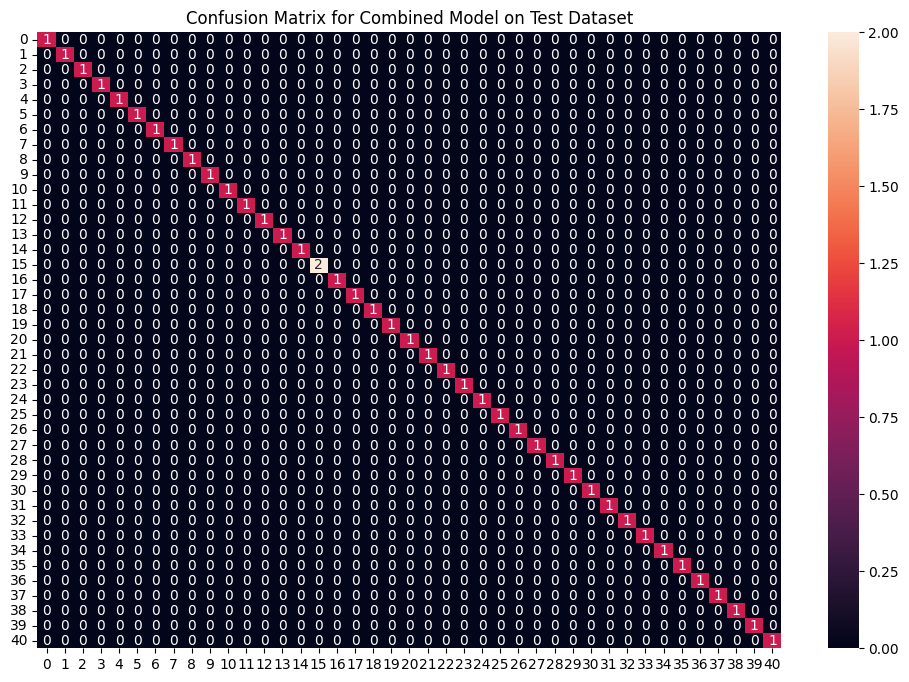

In [42]:
cf_matrix = confusion_matrix(test_y, final_preds) 
plt.figure(figsize=(12,8)) 
  
sns.heatmap(cf_matrix, annot = True) 
plt.title("Confusion Matrix for Combined Model on Test Dataset") 
plt.show()

Creating a function that can take symptoms as input and generate predictions for disease

In [43]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")
warnings.filterwarnings("ignore", category=FutureWarning, message="Unlike other reduction functions")
warnings.filterwarnings("ignore", category=DeprecationWarning, message="Support for non-numeric arrays")

In [48]:
symptoms =X.columns.values
from scipy.stats import mode

symptom_index={}

for index,value in enumerate(symptoms):
    symptom= " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom]=index



In [49]:
import numpy as np
from scipy.stats import mode  # Ensure this import is at the top if using mode()

# Assuming final_rf_model, final_nb_model, final_svm_model are properly defined or loaded

# Assuming data_dict is correctly defined as in your example
data_dict = {
    "symptoms_index": symptom_index,
    "predictions_classes": encoder.classes_
}

def predictdisease(symptoms):
    symptoms = symptoms.split(",")
    
    input_data = [0] * len(data_dict["symptoms_index"])
    for symptom in symptoms:
        symptom_capitalized = " ".join([i.capitalize() for i in symptom.strip().split("_")])
        if symptom_capitalized in data_dict["symptoms_index"]:
            index = data_dict["symptoms_index"][symptom_capitalized]
            input_data[index] = 1
    
    input_data = np.array(input_data).reshape(1, -1)

    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # Calculate final prediction using np.argmax() and np.bincount()
    predictions = [rf_prediction, nb_prediction, svm_prediction]
    values, counts = np.unique(predictions, return_counts=True)
    final_prediction_index = np.argmax(counts)
    final_prediction = predictions[final_prediction_index]

    result = {
        "Random Forest": rf_prediction,
        "Naive Bayes": nb_prediction,
        "Support Vector Machine": svm_prediction,
        "Final Prediction": final_prediction
    }

    return result

# Example usage
print(predictdisease("Vomiting, Fatigue, Headache"))


{'Random Forest': 'Paralysis (brain hemorrhage)', 'Naive Bayes': 'Paralysis (brain hemorrhage)', 'Support Vector Machine': 'Paralysis (brain hemorrhage)', 'Final Prediction': 'Paralysis (brain hemorrhage)'}


In [28]:
symptoms

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_press

In [33]:
print(len(symptoms))

132


In [37]:
if __name__ == "__main__":
    while True:
        user_input = input("Enter symptoms separated by commas : ")
        predictions = predictdisease(user_input)
        print("Predictions:")
        for model, prediction in predictions.items():
            print(f"{model}: {prediction}")


Predictions:
Random Forest: Gastroenteritis
Naive Bayes: Paralysis (brain hemorrhage)
Support Vector Machine: Gastroenteritis
final_prediction: Gastroenteritis


KeyError: ''

In [50]:
import joblib

joblib.dump(final_svm_model, "svc_model.joblib")
joblib.dump(final_nb_model, "nb_model.joblib")
joblib.dump(final_rf_model, "rf_model.joblib")

['rf_model.joblib']

In [51]:
svc_model = joblib.load("svc_model.joblib")
nb_model = joblib.load("rf_model.joblib")
rf_model = joblib.load("nb_model.joblib")

In [51]:
X.columns.values

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_press

In [52]:
import sklearn
print(sklearn.__version__)


1.3.0


In [54]:
%pip install streamlit 

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/c6/51/f140402202af6ce1bf747243f66415c5eb2f43ba2e2ac419a7e855d20673/streamlit-1.36.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/46/30/2118537233fa72c1d91a81f5908a7e843a6601ccc68b76838ebc4951505f/altair-5.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bb/2a/10164ed1f31196a2f7f3799368a821765c62851ead0e630ab52b8e14b4d0/blinker-1.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/fb/2b/a64c2d25a37aeb921fddb929111413049fc5f8b9a4c1aefaffaafe768d54/cachetools-5.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<6,>=3.20 from https://files.pythonhosted.org/packages/b1/04/73b8fd7f34f3a2b2b64aa31a173b8aebbdb0c55523df4c027846bb44b

In [55]:
import streamlit as st # type: ignore
st.title("Disease Prediction Based on Symptoms")

symptoms_input = st.text_input("Enter symptoms separated by commas (e.g., 'Stomach pain, Vomiting, Weight loss')")

if st.button("Predict"):
    if symptoms_input:
        prediction = predictdisease(symptoms_input)
        st.write(f"Predicted Disease: {prediction['final_prediction']}")
        st.write(f"Random Forest: {prediction['Random Forest']}")
        st.write(f"Naive Bayes: {prediction['Naive Bayes']}")
        st.write(f"Support Vector Machine: {prediction['Support Vector Machine']}")
    else:
        st.warning("Please enter symptoms.")

2024-07-07 19:38:34.180 
  command:

    streamlit run C:\Users\suman\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-07-07 19:38:34.182 Session state does not function when running a script without `streamlit run`


In [52]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder 
from scipy.stats import mode

# Load models
svm_model = joblib.load("svc_model.joblib")
nb_model = joblib.load("rf_model.joblib")
rf_model = joblib.load("nb_model.joblib")

In [53]:
df=pd.read_csv("./datasets/Testing.csv").dropna(axis=1)
encoder=LabelEncoder()
encoder.fit_transform(df["prognosis"])

X=df.iloc[:,:-1]

In [ ]:
import numpy as np

# Inside your predictdisease() function



In [57]:
symptoms =X.columns.values




symptom_index={}

for index,value in enumerate(symptoms):
    symptom= " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom]=index

data_dict={
    "symptoms_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function 
# Input: string containing symptoms separated by commas 
# Output: Generated predictions by models

def predictdisease(symptoms):
    # Converting the input string to a list of symptoms
    symptoms=symptoms.split(",")

    input_data=[0]*len(data_dict["symptoms_index"])
    for symptom in symptoms:
        index = data_dict["symptoms_index"][symptom]
        input_data[index]=1
    

    input_data=np.array(input_data).reshape(1,-1)
    # Predicting the disease using the trained model

    rf_predicton =data_dict["predictions_classes"][rf_model.predict(input_data)[0]]
    nb_prediction =data_dict["predictions_classes"][nb_model.predict(input_data)[0]]
    svm_prediction =data_dict["predictions_classes"][svm_model.predict(input_data)[0]]

    final_prediction= mode([rf_predicton,nb_prediction,svm_prediction])[0][0]
    predictions = [rf_predicton, nb_prediction, svm_prediction]
    values, counts = np.unique(predictions, return_counts=True)
    final_prediction = values[np.argmax(counts)]

    predictions={
        "Random Forest":rf_predicton,
        "Naive Bayes":nb_prediction,
        "Support Vector Machine":svm_prediction,
        "final_prediction":final_prediction

    }
    return predictions


print(predictdisease("Vomiting"))

{'Random Forest': 'Paralysis (brain hemorrhage)', 'Naive Bayes': 'Gastroenteritis', 'Support Vector Machine': 'Gastroenteritis', 'final_prediction': 'Gastroenteritis'}
